In [1]:
import pandas as pd
import numpy as np
import folium
import requests 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

In [1]:
conda install lxml

In [3]:
CLIENT_ID = 'VW4VLHTUFDIKSYZBGCTZXH1M5ZWYOTUK1FGZTVOL43CUBSV0' # your Foursquare ID
CLIENT_SECRET = '1E0BIST1N1QPBE5GGM0NWYCQWXQWOR02IHMPRHYYRTSHWA5W' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 150 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VW4VLHTUFDIKSYZBGCTZXH1M5ZWYOTUK1FGZTVOL43CUBSV0
CLIENT_SECRET:1E0BIST1N1QPBE5GGM0NWYCQWXQWOR02IHMPRHYYRTSHWA5W


In [4]:
pal=sns.color_palette()
color_list=pal.as_hex()

In [6]:
london_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs')
london_data2=pd.read_csv('housing_in_london_yearly_variables.csv')

In [7]:
london_data_temp= london_data[1]
london_data_temp=london_data_temp.append(london_data[0]);
london_data_temp.reset_index(inplace=True)
london_data_temp=london_data_temp[['Borough','Co-ordinates']]

In [8]:
london_borough=london_data_temp[['Borough']]
long_sign=london_data_temp['Co-ordinates'].str.slice(35,).str.contains('E').replace(False,-1)
london_borough['Longitude']=pd.to_numeric(london_data_temp['Co-ordinates'].str.slice(35,-2))
london_borough['Latitude']=pd.to_numeric(london_data_temp['Co-ordinates'].str.slice(25, 31))

london_borough['Longitude']=london_borough['Longitude']*long_sign


In [9]:
london_borough

,Borough,Longitude,Latitude
0,City of London,-0.0922,51.515
1,Barking and Dagenham [note 1],0.1557,51.560
2,Barnet,-0.1517,51.625
3,Bexley,0.1505,51.454
4,Brent,-0.2817,51.558
5,Bromley,0.0198,51.403
6,Camden,-0.1255,51.529
7,Croydon,-0.0977,51.371
8,Ealing,-0.3089,51.513
9,Enfield,-0.0799,51.653


In [10]:
london_borough['Borough']=london_borough['Borough'].str.lower();
#london_borough['Borough'].str.replace('[note 1]','')
#.str.replace('(\(\d\d\d\d\))', '')
london_borough['Borough']=london_borough.Borough.str.replace('\[note \d\]', '')
london_borough['Borough']=london_borough['Borough'].str.strip();

In [12]:
london_data2=london_data2[london_data2['borough_flag']==1]
df_london18=london_data2[london_data2['date']=='2018-12-01']
df_london18.reset_index(inplace=True)
df_london18=df_london18[['area','life_satisfaction','mean_salary','population_size','number_of_jobs','area_size']]

In [13]:
df_london18.replace('#', np.nan,inplace=True)
df_london18['mean_salary']=pd.to_numeric(df_london18['mean_salary'])
df_london18.fillna(df_london18.mean(), inplace=True);
df_london18.rename(columns={'area':'Borough'},inplace=True);

In [14]:
df_london=df_london18.merge(london_borough, on='Borough')

In [25]:
df_london.head()

,Borough,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,Longitude,Latitude
0,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515
1,barking and dagenham,7.520000,32671.0,211998.0,66000.0,3780.0,0.1557,51.560
2,barnet,7.550000,36776.0,392140.0,170000.0,8675.0,-0.1517,51.625
3,bexley,7.540000,34496.0,247258.0,87000.0,6429.0,0.1505,51.454
4,brent,7.710000,35830.0,330795.0,157000.0,4323.0,-0.2817,51.558


In [15]:
address = 'London'

geolocator = Nominatim(user_agent="lo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 51.5073219, -0.1276474.


In [16]:

latitude=51.5073219;
longitude=-0.1276474;

map_london = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df_london['Latitude'], df_london['Longitude'], df_london['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [43]:
LIMIT

150

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
# type your answer here
london_venues = getNearbyVenues(names=df_london['Borough'],
                                   latitudes=df_london['Latitude'],
                                   longitudes=df_london['Longitude'],
                                   radius=2000
                                  )
london_venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,city of london,51.515,-0.0922,The Ned Hotel,51.513755,-0.090067,Hotel
1,city of london,51.515,-0.0922,The Merchant House,51.513264,-0.093039,Cocktail Bar
2,city of london,51.515,-0.0922,Rosslyn,51.512574,-0.093381,Coffee Shop
3,city of london,51.515,-0.0922,M&S Simply Food,51.513590,-0.095297,Grocery Store
4,city of london,51.515,-0.0922,Porterford Butchers,51.513032,-0.093737,Butcher
...,...,...,...,...,...,...,...
2904,westminster,51.497,-0.1372,Rapha Cycle Club,51.510842,-0.136704,Bike Shop
2905,westminster,51.497,-0.1372,Mount Street Gardens,51.509143,-0.150203,Park
2906,westminster,51.497,-0.1372,Ham Yard Hotel,51.511236,-0.134656,Hotel
2907,westminster,51.497,-0.1372,The Park Tower Knightsbridge,51.501725,-0.158725,Hotel


In [19]:
print('number of unique venue categories: {}'.format(len(london_venues['Venue Category'].unique())))

number of unique venue categories: 276


In [20]:
a=london_venues.groupby('Borough').count()
a.reset_index(inplace=True)
a.sort_values('Venue', axis=0, inplace=True)

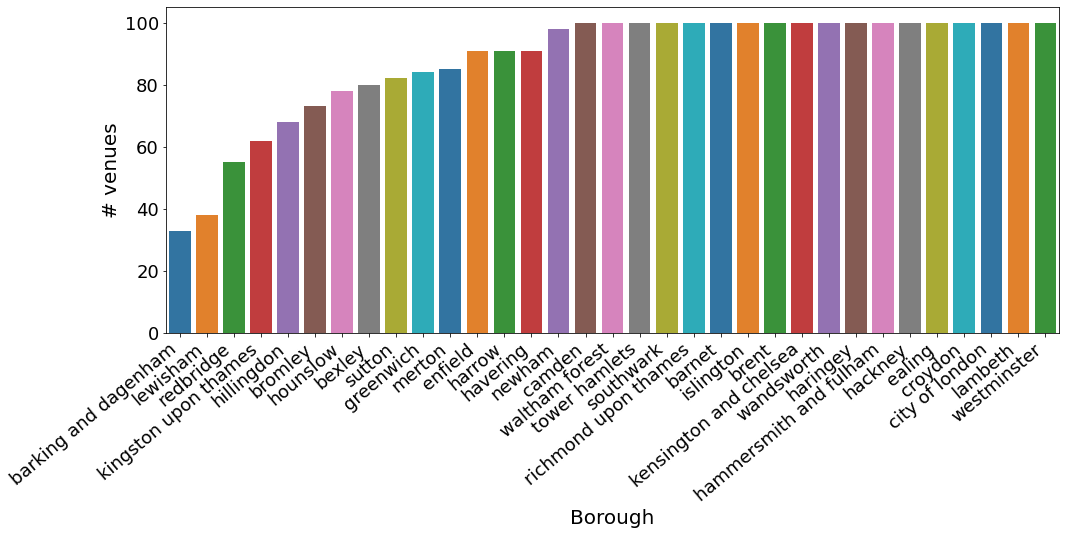

In [21]:
plt.figure(figsize=(16,6))
ax=sns.barplot(x="Borough", y='Venue', data=a,ci=None,palette=sns.color_palette())
plt.xlabel('Borough',fontsize=20)
plt.ylabel('# venues',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40,ha="right")
plt.savefig('venues.jpg')
plt.show()


In [22]:
# one hot encoding
london_venue_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_venue_onehot['Borough'] = london_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_venue_onehot.columns[-1]] + list(london_venue_onehot.columns[:-1])
london_venue_onehot = london_venue_onehot[fixed_columns]


london_venues_grouped=london_venue_onehot.groupby('Borough').mean().reset_index()

df_london_final=df_london.merge(london_venue_onehot, on='Borough')

df_london_final_grouped = df_london_final.groupby('Borough').mean().reset_index()

#london_venue_onehot.head()

In [54]:
df_london_final

,Borough,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,Longitude,Latitude,Afghan Restaurant,African Restaurant,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515,0,0,...,0,0,0,0,0,0,0,0,0,0
1,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515,0,0,...,0,0,0,0,0,0,0,0,0,0
2,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515,0,0,...,0,0,0,0,0,0,0,0,0,0
3,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515,0,0,...,0,0,0,0,0,0,0,0,0,0
4,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,westminster,7.660000,63792.0,255324.0,775000.0,2203.0,-0.1372,51.497,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,westminster,7.660000,63792.0,255324.0,775000.0,2203.0,-0.1372,51.497,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,westminster,7.660000,63792.0,255324.0,775000.0,2203.0,-0.1372,51.497,0,0,...,0,0,0,0,0,0,0,0,0,0
2897,westminster,7.660000,63792.0,255324.0,775000.0,2203.0,-0.1372,51.497,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
london_venues_grouped.head()

,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,barking and dagenham,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,barnet,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,bexley,0.0,0.0,0.0,0.0,0.0,0.025316,0.0,0.0,0.0,...,0.012658,0.0,0.012658,0.0,0.0,0.0,0.012658,0.0,0.0,0.0
3,brent,0.0,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.0,...,0.000000,0.0,0.020000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,bromley,0.0,0.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories=row.iloc[1:]
    row_categories_sorted=row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = london_venues_grouped['Borough']

for ind in np.arange(london_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,barking and dagenham,Supermarket,Grocery Store,Gas Station,Park,Platform,Convenience Store,Coffee Shop,Soccer Field,Café,Flower Shop
1,barnet,Coffee Shop,Grocery Store,Pub,Park,Café,Turkish Restaurant,Pharmacy,Supermarket,Italian Restaurant,Fast Food Restaurant
2,bexley,Pub,Supermarket,Chinese Restaurant,Fast Food Restaurant,Coffee Shop,Clothing Store,Hotel,Grocery Store,Italian Restaurant,Indian Restaurant
3,brent,Coffee Shop,Indian Restaurant,Grocery Store,Hotel,Clothing Store,Sandwich Place,Bar,Gym / Fitness Center,Sporting Goods Shop,Pizza Place
4,bromley,Pub,Clothing Store,Park,Coffee Shop,Indian Restaurant,Pizza Place,Gym / Fitness Center,Supermarket,Electronics Store,Bar


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

london_grouped_clustering = df_london_final_grouped.drop(['Borough','Longitude','Latitude'],1)

#StandardScaler().fit_transform(df_london_final_grouped['life_satisfaction'])

london_grouped_clustering.iloc[:,:5]=StandardScaler().fit_transform(london_grouped_clustering.iloc[:,:5]);

london_grouped_clustering.head()

,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,-0.381321,-0.784334,-0.778073,-0.783126,-0.326122,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
1,-0.200992,-0.441496,1.640882,-0.106297,1.190769,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
2,-0.261102,-0.631915,-0.304600,-0.646458,0.494765,0.0,0.0,0.0,0.0,0.0,...,0.0125,0.0,0.0125,0.0,0.0,0.0,0.0125,0.0,0.0,0.0
3,0.760764,-0.520503,0.817139,-0.190900,-0.157854,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0200,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
4,-0.080772,-0.573036,0.821181,-0.386140,3.154825,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0


In [26]:
#np.sum(london_grouped_clustering.iloc[1,:]**2)
def centroid_distance(data,centroids):
    d=0
    for i in range(0,data.shape[0]):
        d+=np.sqrt(sum((data.iloc[i,2:]-centroids[data.iloc[i,1]])**2))
    return(d/data.shape[0])

In [27]:


# set number of clusters
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)


centroids=kmeans.cluster_centers_

london_grouped_clustering.insert(0, 'Cluster Labels', kmeans.labels_)
london_grouped_clustering.insert(0, 'Borough', df_london_final_grouped['Borough'])
london_grouped_clustering0=london_grouped_clustering
london_grouped_clustering = london_grouped_clustering.iloc[:,:7]

london_grouped_clustering.head()

,Borough,Cluster Labels,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size
0,barking and dagenham,1,-0.381321,-0.784334,-0.778073,-0.783126,-0.326122
1,barnet,3,-0.200992,-0.441496,1.640882,-0.106297,1.190769
2,bexley,1,-0.261102,-0.631915,-0.304600,-0.646458,0.494765
3,brent,0,0.760764,-0.520503,0.817139,-0.190900,-0.157854
4,bromley,3,-0.080772,-0.573036,0.821181,-0.386140,3.154825


In [36]:
temp=df_london[['Borough','Longitude','Latitude']]
temp.head()

,Borough,Longitude,Latitude
0,city of london,-0.0922,51.515
1,barking and dagenham,0.1557,51.560
2,barnet,-0.1517,51.625
3,bexley,0.1505,51.454
4,brent,-0.2817,51.558


In [2]:
london_grouped_clustering=london_grouped_clustering.merge(df_london[['Borough','Longitude','Latitude']], on='Borough')
london_grouped_clustering

In [41]:
neighborhoods_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,barking and dagenham,Supermarket,Grocery Store,Gas Station,Park,Platform,Convenience Store,Coffee Shop,Soccer Field,Café,Flower Shop
1,barnet,Coffee Shop,Grocery Store,Pub,Park,Café,Turkish Restaurant,Pharmacy,Supermarket,Italian Restaurant,Fast Food Restaurant
2,bexley,Pub,Supermarket,Chinese Restaurant,Fast Food Restaurant,Coffee Shop,Clothing Store,Hotel,Grocery Store,Italian Restaurant,Indian Restaurant
3,brent,Coffee Shop,Indian Restaurant,Grocery Store,Hotel,Clothing Store,Bar,Sandwich Place,Gym / Fitness Center,Sporting Goods Shop,Pizza Place
4,bromley,Pub,Clothing Store,Park,Coffee Shop,Indian Restaurant,Pizza Place,Gym / Fitness Center,Supermarket,Electronics Store,Bar


In [29]:

df_London_cluster=london_grouped_clustering.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')
#london_grouped_clustering.join(df_london.set_index('Borough'),on='Borough')

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
#df_London_cluster = df_London_cluster.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

#df_London_cluster.insert(0, 'Cluster Labels', kmeans.labels_)
#df_London_cluster.head() # check the last columns!


#df_London_cluster.iloc[:,2:]

df_London_cluster.head()

,Borough,Cluster Labels,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,barking and dagenham,1,-0.381321,-0.784334,-0.778073,-0.783126,-0.326122,0.1557,51.560,Supermarket,Grocery Store,Gas Station,Park,Platform,Convenience Store,Coffee Shop,Soccer Field,Café,Flower Shop
1,barnet,3,-0.200992,-0.441496,1.640882,-0.106297,1.190769,-0.1517,51.625,Coffee Shop,Grocery Store,Pub,Park,Café,Turkish Restaurant,Pharmacy,Supermarket,Italian Restaurant,Fast Food Restaurant
2,bexley,1,-0.261102,-0.631915,-0.304600,-0.646458,0.494765,0.1505,51.454,Pub,Supermarket,Chinese Restaurant,Fast Food Restaurant,Coffee Shop,Clothing Store,Hotel,Grocery Store,Italian Restaurant,Indian Restaurant
3,brent,0,0.760764,-0.520503,0.817139,-0.190900,-0.157854,-0.2817,51.558,Coffee Shop,Indian Restaurant,Grocery Store,Hotel,Clothing Store,Sandwich Place,Bar,Gym / Fitness Center,Sporting Goods Shop,Pizza Place
4,bromley,3,-0.080772,-0.573036,0.821181,-0.386140,3.154825,0.0198,51.403,Pub,Clothing Store,Park,Coffee Shop,Indian Restaurant,Pizza Place,Gym / Fitness Center,Supermarket,Electronics Store,Bar


In [30]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters+3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_London_cluster['Latitude'], df_London_cluster['Longitude'], df_London_cluster['Borough'], df_London_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=color_list[cluster],
        fill=True,
        fill_color=color_list[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [31]:
temp=london_grouped_clustering

In [32]:
d_list=[]


for n in range(1,20):
    temp=temp.drop(['Borough','Cluster Labels'],1)

# set number of clusters
    kclusters = n


# run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(temp)


    centroids=kmeans.cluster_centers_

    temp.insert(0, 'Cluster Labels', kmeans.labels_)
    temp.insert(0, 'Borough', df_london_final_grouped['Borough'])

    temp.head()
    d_list.append(centroid_distance(temp, centroids))


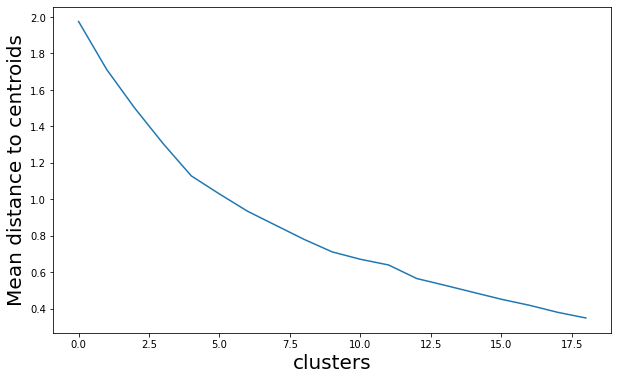

In [59]:


plt.figure(figsize=(10,6))
plt.plot(d_list)
plt.xlabel('clusters',fontsize=20)
plt.ylabel('Mean distance to centroids',fontsize=20)
plt.show()

In [52]:
df_London_cluster.head()

,Borough,Cluster Labels,life_satisfaction,mean_salary,population_size,number_of_jobs,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,barking and dagenham,1,-0.381321,-0.784334,-0.778073,-0.783126,0.1557,51.560,Supermarket,Grocery Store,Gas Station,Park,Platform,Convenience Store,Coffee Shop,Soccer Field,Café,Flower Shop
1,barnet,4,-0.200992,-0.441496,1.640882,-0.106297,-0.1517,51.625,Coffee Shop,Grocery Store,Pub,Park,Café,Turkish Restaurant,Pharmacy,Supermarket,Italian Restaurant,Fast Food Restaurant
2,bexley,1,-0.261102,-0.631915,-0.304600,-0.646458,0.1505,51.454,Pub,Supermarket,Chinese Restaurant,Fast Food Restaurant,Coffee Shop,Clothing Store,Hotel,Grocery Store,Italian Restaurant,Indian Restaurant
3,brent,1,0.760764,-0.520503,0.817139,-0.190900,-0.2817,51.558,Coffee Shop,Indian Restaurant,Grocery Store,Hotel,Clothing Store,Bar,Sandwich Place,Gym / Fitness Center,Sporting Goods Shop,Pizza Place
4,bromley,4,-0.080772,-0.573036,0.821181,-0.386140,0.0198,51.403,Pub,Clothing Store,Park,Coffee Shop,Indian Restaurant,Pizza Place,Gym / Fitness Center,Supermarket,Electronics Store,Bar


In [364]:
df_London_cluster.loc[df_London_cluster['Cluster Labels'] == 1, ['life_satisfaction','mean_salary','population_size','number_of_jobs']].mean()

life_satisfaction   -0.261102
mean_salary         -0.512376
population_size      0.280942
number_of_jobs      -0.487764
dtype: float64

In [67]:
df_London_cluster.loc[df_London_cluster['Cluster Labels'] == 2, ['Borough','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,city of london,Coffee Shop,Gym / Fitness Center,Cocktail Bar,Food Truck,Italian Restaurant
32,westminster,Hotel,Coffee Shop,Park,Café,Theater


In [68]:
df_London_cluster.loc[df_London_cluster['Cluster Labels'] == 0, ['Borough','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,brent,Coffee Shop,Clothing Store,Hotel,Bar,Indian Restaurant
12,hammersmith and fulham,Pub,Café,Coffee Shop,Italian Restaurant,Park
14,harrow,Coffee Shop,Indian Restaurant,Sandwich Place,Clothing Store,Bar
17,hounslow,Indian Restaurant,Hotel,Coffee Shop,Grocery Store,Clothing Store
20,kingston upon thames,Pub,Coffee Shop,Café,Italian Restaurant,Burger Joint
23,merton,Park,Supermarket,Café,Pub,Fast Food Restaurant
26,richmond upon thames,Pub,Coffee Shop,Café,Italian Restaurant,Park
28,sutton,Coffee Shop,Pub,Café,Clothing Store,Pizza Place
29,tower hamlets,Coffee Shop,Hotel,Burger Joint,Gym / Fitness Center,Italian Restaurant
31,wandsworth,Pub,Café,Grocery Store,Coffee Shop,Thai Restaurant


In [69]:
df_London_cluster.loc[df_London_cluster['Cluster Labels'] == 1, ['Borough','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,barking and dagenham,Park,Grocery Store,Gas Station,Supermarket,Pub
2,bexley,Pub,Coffee Shop,Fast Food Restaurant,Clothing Store,Supermarket
5,camden,Coffee Shop,Hotel,Bookstore,Bar,Breakfast Spot
8,ealing,Pub,Coffee Shop,Park,Italian Restaurant,Hotel
9,enfield,Pub,Coffee Shop,Clothing Store,Grocery Store,Supermarket
10,greenwich,Pub,Grocery Store,Fast Food Restaurant,Plaza,Coffee Shop
11,hackney,Pub,Coffee Shop,Brewery,Bakery,Café
13,haringey,Pub,Coffee Shop,Fast Food Restaurant,Grocery Store,Clothing Store
18,islington,Pub,French Restaurant,Coffee Shop,Mediterranean Restaurant,Gastropub
19,kensington and chelsea,Restaurant,Pub,Garden,Café,Gym / Fitness Center


In [367]:
df_London_cluster.loc[df_London_cluster['Cluster Labels'] == 2, ['life_satisfaction','mean_salary','population_size','number_of_jobs']].mean()

life_satisfaction    0.230108
mean_salary          2.910386
population_size     -1.852088
number_of_jobs       3.391737
dtype: float64

In [ ]:
df_London_cluster.loc[df_London_cluster['Cluster Labels'] == 3, :]

In [64]:
df_london_final

,Borough,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,Longitude,Latitude,Afghan Restaurant,African Restaurant,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515,0,0,...,0,0,0,0,0,0,0,0,0,0
1,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515,0,0,...,0,0,0,0,0,0,0,0,0,0
2,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515,0,0,...,0,0,0,0,0,0,0,0,0,0
3,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515,0,0,...,0,0,0,0,0,0,0,0,0,0
4,city of london,7.583437,90028.0,8706.0,640000.0,315.0,-0.0922,51.515,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,westminster,7.660000,63792.0,255324.0,775000.0,2203.0,-0.1372,51.497,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,westminster,7.660000,63792.0,255324.0,775000.0,2203.0,-0.1372,51.497,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,westminster,7.660000,63792.0,255324.0,775000.0,2203.0,-0.1372,51.497,0,0,...,0,0,0,0,0,0,0,0,0,0
2897,westminster,7.660000,63792.0,255324.0,775000.0,2203.0,-0.1372,51.497,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
temp=df_london_final.merge(df_London_cluster[['Borough','Cluster Labels']], on='Borough')

In [34]:
temp=df_london_final.groupby('Borough').sum().merge(df_London_cluster[['Borough','Cluster Labels']], on='Borough')

In [35]:
temp2=temp.groupby('Cluster Labels').mean()
temp=temp.groupby('Cluster Labels').sum()

In [81]:
temp

,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,Longitude,Latitude,Afghan Restaurant,African Restaurant,Airport,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,6318.06000,3.579153e+07,204373959.0,126332000.0,3191650.0,-197.4676,41951.138,0,0,0,...,2,3,2,3,0,0,1,0,2,0
1,9438.71000,5.097640e+07,357648895.0,220291000.0,4579639.0,-92.5668,65440.581,1,3,1,...,5,4,8,5,0,1,8,4,3,4
2,1524.34375,1.538200e+07,26403000.0,141500000.0,251800.0,-22.9400,10301.200,0,0,0,...,0,0,2,0,1,0,2,1,0,0
3,2514.23000,1.194396e+07,107996618.0,47946000.0,3640645.0,-23.7042,16885.204,0,0,0,...,0,2,0,1,0,0,0,1,1,0


In [36]:
temp.reset_index(inplace=True)
temp2.reset_index(inplace=True)

In [94]:
temp.iloc[[:],8:]

SyntaxError: invalid syntax (<ipython-input-94-aa2e9f16fc3d>, line 1)

In [38]:
temp3=temp.div(temp.population_size, axis=0)
temp3["Cluster Labels"]=temp["Cluster Labels"]
temp3["Cluster Labels"].astype(int)

0    0
1    1
2    2
3    3
Name: Cluster Labels, dtype: int64

In [57]:
a=temp[['Cluster Labels','population_size','number_of_jobs','area_size']]
b=temp2[['life_satisfaction','mean_salary']]

a.insert(1,'life_satisfaction',b['life_satisfaction'])
a.insert(1,'mean_salary',b['mean_salary'])

#a.merge(b, on='Borough')

a

,Cluster Labels,mean_salary,life_satisfaction,population_size,number_of_jobs,area_size
0,0,3.891165e+06,696.337000,224790955.0,133993000.0,3570340.0
1,1,3.431277e+06,640.976875,390912225.0,233019000.0,5125298.0
2,2,7.691000e+06,762.171875,26403000.0,141500000.0,251800.0
3,3,3.154175e+06,660.634000,146107350.0,65211000.0,4656795.0


In [40]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Cluster Labels']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Cluster Labels'] = temp['Cluster Labels']

for ind in np.arange(temp.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(temp.iloc[ind, 8:], num_top_venues)

neighborhoods_venues_sorted.head()

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Pub,Coffee Shop,Indian Restaurant,Café,Park
1,1,Pub,Coffee Shop,Park,Café,Grocery Store
2,2,Hotel,Coffee Shop,Café,Gym / Fitness Center,Plaza
3,3,Coffee Shop,Pub,Clothing Store,Grocery Store,Park


In [41]:
temp.iloc[2, 8:]

Afghan Restaurant     0.0
African Restaurant    0.0
Airport               0.0
Airport Lounge        0.0
Airport Service       0.0
                     ... 
Windmill              0.0
Wine Bar              4.0
Wine Shop             1.0
Women's Store         0.0
Yoga Studio           0.0
Name: 2, Length: 276, dtype: float64

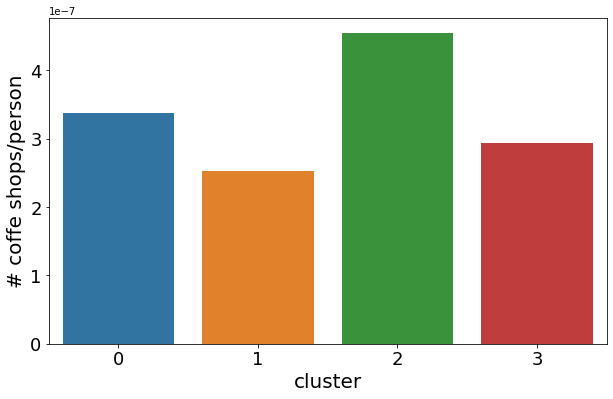

In [59]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="Cluster Labels", y='Coffee Shop', data=temp3,ci=None,palette=sns.color_palette())
plt.xlabel('cluster',fontsize=20)
plt.ylabel('# coffe shops/person',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

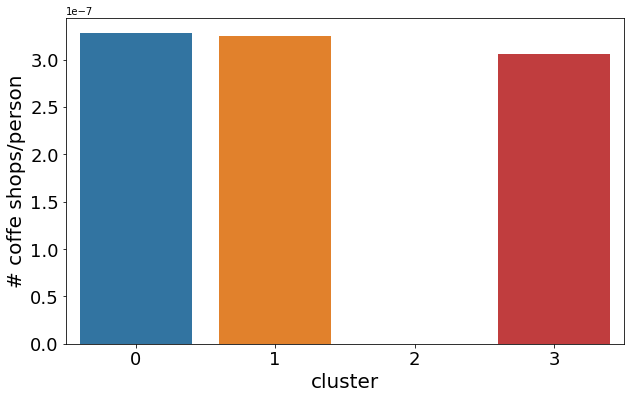

In [102]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="Cluster Labels", y='Pub', data=temp3,ci=None,palette=sns.color_palette())
plt.xlabel('cluster',fontsize=20)
plt.ylabel('# coffe shops/person',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

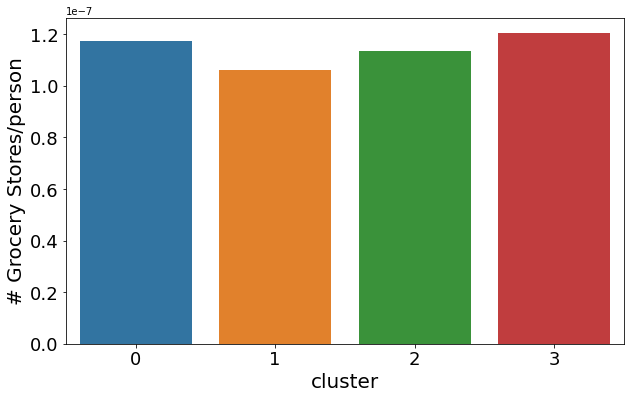

In [100]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="Cluster Labels", y='Grocery Store', data=temp3,ci=None)
plt.xlabel('cluster',fontsize=20)
plt.ylabel('# Grocery Stores/person',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

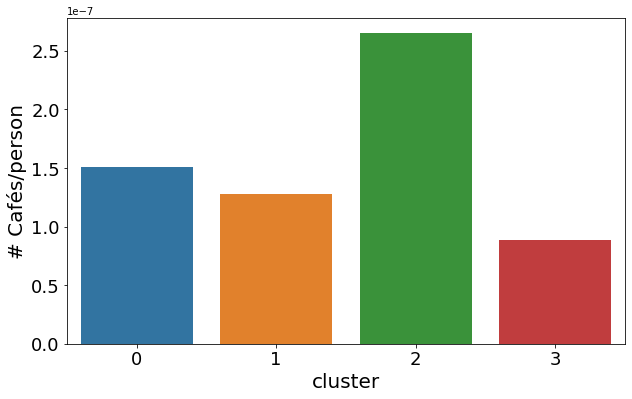

In [61]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="Cluster Labels", y='Café', data=temp3,ci=None)
plt.xlabel('cluster',fontsize=20)
plt.ylabel('# Cafés/person',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

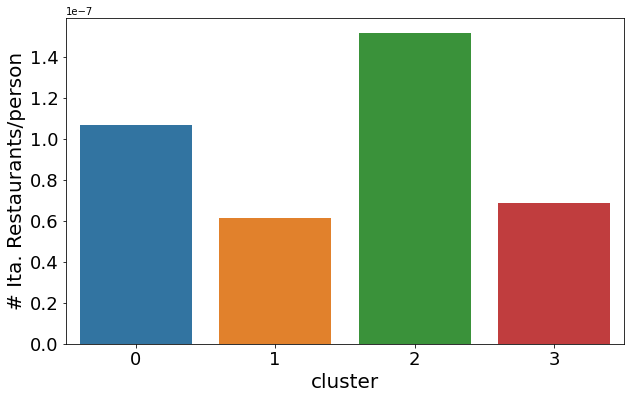

In [62]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="Cluster Labels", y='Italian Restaurant', data=temp3,ci=None)
plt.xlabel('cluster',fontsize=20)
plt.ylabel('# Ita. Restaurants/person',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

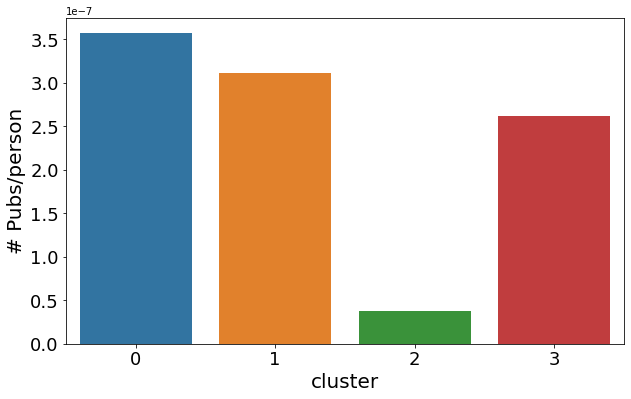

In [127]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="Cluster Labels", y='Pub', data=temp3,ci=None)
plt.xlabel('cluster',fontsize=20)
plt.ylabel('# Pubs/person',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

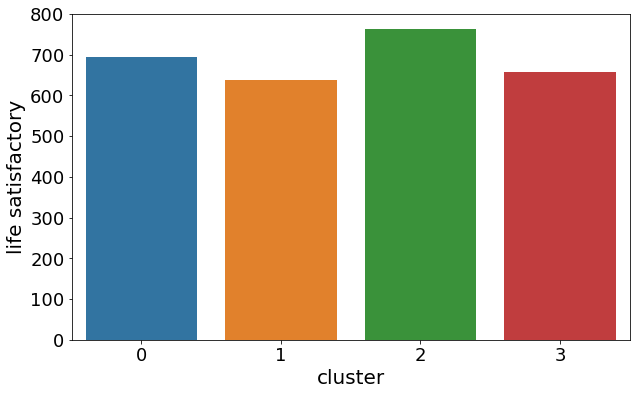

In [121]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="Cluster Labels", y="life_satisfaction", data=temp2,ci=None)
plt.xlabel('cluster',fontsize=20)
plt.ylabel('life satisfactory',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

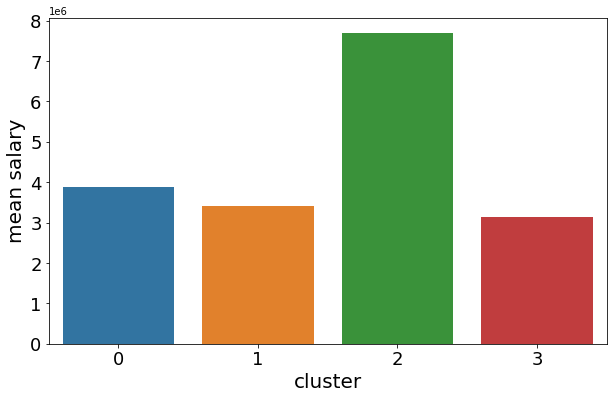

In [116]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="Cluster Labels", y="mean_salary", data=temp2,ci=None)
plt.xlabel('cluster',fontsize=20)
plt.ylabel('mean salary',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

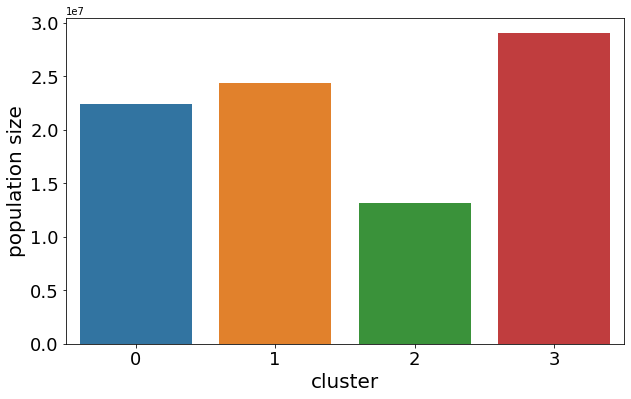

In [117]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="Cluster Labels", y="population_size", data=temp2,ci=None)
plt.xlabel('cluster',fontsize=20)
plt.ylabel('population size',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

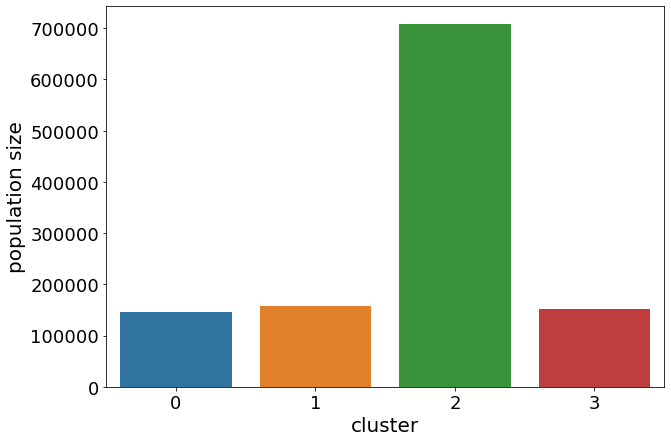

In [142]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x="Cluster Labels", y="number_of_jobs", data=temp2,ci=None)
plt.xlabel('cluster',fontsize=20)
plt.ylabel('population size',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

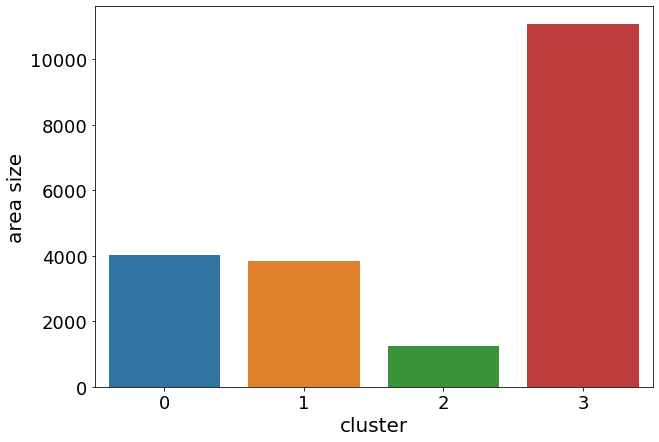

In [144]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x="Cluster Labels", y="area_size", data=temp2,ci=None)
plt.xlabel('cluster',fontsize=20)
plt.ylabel('area size',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [99]:
temp2=df_london_final.groupby('Borough').mean().merge(df_London_cluster[['Borough','Cluster Labels']], on='Borough')

temp2

,Borough,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,Longitude,Latitude,Afghan Restaurant,African Restaurant,...,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Cluster Labels
0,barking and dagenham,7.520000,32671.00000,211998.0,66000.0,3780.0,0.1557,51.560,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,1
1,barnet,7.550000,36776.00000,392140.0,170000.0,8675.0,-0.1517,51.625,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,3
2,bexley,7.540000,34496.00000,247258.0,87000.0,6429.0,0.1505,51.454,0.00,0.000000,...,0.000000,0.012658,0.00,0.00,0.00,0.012658,0.000000,0.000000,0.00,1
3,brent,7.710000,35830.00000,330795.0,157000.0,4323.0,-0.2817,51.558,0.00,0.000000,...,0.000000,0.020000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0
4,bromley,7.570000,35201.00000,331096.0,127000.0,15013.0,0.0198,51.403,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,3
5,camden,7.480000,46502.00000,262226.0,403000.0,2179.0,-0.1255,51.529,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.030000,0.000000,0.000000,0.00,1
6,city of london,7.583437,90028.00000,8706.0,640000.0,315.0,-0.0922,51.515,0.00,0.000000,...,0.000000,0.000000,0.00,0.02,0.00,0.020000,0.000000,0.000000,0.00,2
7,croydon,7.690000,36880.00000,385346.0,149000.0,8650.0,-0.0977,51.371,0.00,0.000000,...,0.010000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,3
8,ealing,7.530000,36304.00000,341982.0,148000.0,5554.0,-0.3089,51.513,0.00,0.000000,...,0.020000,0.000000,0.00,0.00,0.00,0.020000,0.000000,0.000000,0.00,1
9,enfield,7.370000,37030.00000,333869.0,133000.0,8220.0,-0.0799,51.653,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.011111,0.00,1


In [70]:
df_london_final.columns=='Coffee Shop'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,